In [1]:
from keras import layers
from keras.models import Model
from keras.models import load_model
from keras import callbacks
import os
import cv2
import numpy as np
import tensorflow as tf
import pickle

# Reproducibility
#tf.random.set_random_seed(1234)
#np.random.seed(5678)

symbols = "8bm6dgncep234yxf75w" # All symbols this captcha can contain, using set in labels
num_symbols = len(symbols)
img_shape = (50, 200, 1)

Using TensorFlow backend.


In [2]:
def create_model():
    img = layers.Input(shape=img_shape) # First layer needs the size of the input, shape
    conv1 = layers.Conv2D(16, (3, 3), padding='same', activation='relu')(img) # Determining the kernel size and output size
    mp1 = layers.MaxPooling2D(padding='same')(conv1)  # New size 100x25
    conv2 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp1)
    mp2 = layers.MaxPooling2D(padding='same')(conv2)  # New size 50x13
    conv3 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp2)
    bn = layers.BatchNormalization()(conv3) # Normalize the output
    mp3 = layers.MaxPooling2D(padding='same')(bn)  # New size 25x7
    
    flat = layers.Flatten()(mp3) # Reshape to a vector
    outs = []
    for _ in range(5): # Each letter
        dens1 = layers.Dense(64, activation='relu')(flat)
        drop = layers.Dropout(0.5)(dens1) # Drop half of values to 0, prevent overfitting
        res = layers.Dense(num_symbols, activation='sigmoid')(drop) # Number of classes each symbol has (19 possible labels)

        outs.append(res)
    
    # Compile model and return it
    model = Model(img, outs)
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])
    return model

In [3]:
def preprocess_data():
    n_samples = len(os.listdir('./Train'))
    X = np.zeros((n_samples, 50, 200, 1)) #1000*50*200
    y = np.zeros((5, n_samples, num_symbols)) #5*1000*19

    for i, pic in enumerate(os.listdir('./Train')):
        # Read image as grayscale
        img = cv2.imread(os.path.join('./Train', pic), cv2.IMREAD_GRAYSCALE)
        pic_target = pic[:-4]
        # Scale and reshape image
        img = img / 255.0
        img = np.reshape(img, (50, 200, 1))
        # Define targets and code them using OneHotEncoding
        targs = np.zeros((5, num_symbols))
        for j, l in enumerate(pic_target):
            ind = symbols.find(l)
            targs[j, ind] = 1
        X[i] = img
        y[:, i] = targs
    
    # Return final data
    return X, y

X, y = preprocess_data()
X_train, y_train = X[:900], y[:, :900]
X_test, y_test = X[900:], y[:, 900:]

In [4]:
model=create_model()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [5]:
hist = model.fit(X_train, [y_train[0], y_train[1], y_train[2], y_train[3], y_train[4]], batch_size=32, epochs=60,verbose=1, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 720 samples, validate on 180 samples
Epoch 1/60
720/720 [==============================] - 18s 26ms/step - loss: 15.6410 - dense_2_loss: 2.9491 - dense_4_loss: 3.0955 - dense_6_loss: 3.2306 - dense_8_loss: 3.1652 - dense_10_loss: 3.2006 - dense_2_acc: 0.0597 - dense_4_acc: 0.0542 - dense_6_acc: 0.0653 - dense_8_acc: 0.0569 - dense_10_acc: 0.0667 - val_loss: 24.2564 - val_dense_2_loss: 2.6493 - val_dense_4_loss: 7.2288 - val_dense_6_loss: 3.5677 - val_dense_8_loss: 5.5653 - val_dense_10_loss: 5.2454 - val_dense_2_acc: 0.0000e+00 - val_dense_4_acc: 0.0500 - val_dense_6_acc: 0.0333 - val_dense_8_acc: 0.0944 - val_dense_10_acc: 0.1222
Epoch 2/60
720/720 [==============================] - 14s 20ms/step - loss: 14.6360 - dense_2_loss: 2.8076 - dense_4_loss: 2.9671 - dense_6_loss: 2.9460 - dense_8_loss: 2.9440 - dense_10_loss: 2.9712 - dense_2_acc: 0.0806 - dense_4_acc: 0.0667 - dense_6_acc: 0.0847 - dense_8_acc: 0.1042 - dense_10_acc: 

720/720 [==============================] - 15s 20ms/step - loss: 12.8195 - dense_2_loss: 2.1391 - dense_4_loss: 2.4587 - dense_6_loss: 2.7328 - dense_8_loss: 2.9446 - dense_10_loss: 2.5443 - dense_2_acc: 0.1361 - dense_4_acc: 0.1458 - dense_6_acc: 0.1292 - dense_8_acc: 0.1083 - dense_10_acc: 0.1292 - val_loss: 19.0366 - val_dense_2_loss: 8.3387 - val_dense_4_loss: 2.4314 - val_dense_6_loss: 2.7351 - val_dense_8_loss: 2.9444 - val_dense_10_loss: 2.5871 - val_dense_2_acc: 0.0000e+00 - val_dense_4_acc: 0.2111 - val_dense_6_acc: 0.1278 - val_dense_8_acc: 0.0722 - val_dense_10_acc: 0.2389
Epoch 15/60
720/720 [==============================] - 14s 19ms/step - loss: 12.5125 - dense_2_loss: 2.0906 - dense_4_loss: 2.3994 - dense_6_loss: 2.6526 - dense_8_loss: 2.9119 - dense_10_loss: 2.4580 - dense_2_acc: 0.1403 - dense_4_acc: 0.1167 - dense_6_acc: 0.1472 - dense_8_acc: 0.1264 - dense_10_acc: 0.1528 - val_loss: 19.0959 - val_dense_2_loss: 8.8965 - val_dense_4_loss: 2.2338 - val_dense_6_loss: 2.6

Epoch 28/60
720/720 [==============================] - 15s 20ms/step - loss: 7.8331 - dense_2_loss: 0.7097 - dense_4_loss: 1.2439 - dense_6_loss: 1.7608 - dense_8_loss: 2.3700 - dense_10_loss: 1.7488 - dense_2_acc: 0.6903 - dense_4_acc: 0.5375 - dense_6_acc: 0.3361 - dense_8_acc: 0.2083 - dense_10_acc: 0.3222 - val_loss: 15.8141 - val_dense_2_loss: 9.6020 - val_dense_4_loss: 0.8262 - val_dense_6_loss: 1.5818 - val_dense_8_loss: 2.3082 - val_dense_10_loss: 1.4959 - val_dense_2_acc: 0.1444 - val_dense_4_acc: 0.7500 - val_dense_6_acc: 0.4222 - val_dense_8_acc: 0.2944 - val_dense_10_acc: 0.4611
Epoch 29/60
720/720 [==============================] - 15s 21ms/step - loss: 7.4509 - dense_2_loss: 0.6238 - dense_4_loss: 1.1989 - dense_6_loss: 1.6701 - dense_8_loss: 2.3459 - dense_10_loss: 1.6122 - dense_2_acc: 0.7306 - dense_4_acc: 0.5444 - dense_6_acc: 0.3653 - dense_8_acc: 0.2083 - dense_10_acc: 0.3889 - val_loss: 14.3948 - val_dense_2_loss: 8.5415 - val_dense_4_loss: 0.7490 - val_dense_6_los

Epoch 42/60
720/720 [==============================] - 12s 16ms/step - loss: 5.0422 - dense_2_loss: 0.4776 - dense_4_loss: 0.8156 - dense_6_loss: 1.0727 - dense_8_loss: 1.7370 - dense_10_loss: 0.9394 - dense_2_acc: 0.7972 - dense_4_acc: 0.6653 - dense_6_acc: 0.5542 - dense_8_acc: 0.3542 - dense_10_acc: 0.6083 - val_loss: 13.4527 - val_dense_2_loss: 9.3968 - val_dense_4_loss: 0.7434 - val_dense_6_loss: 1.0409 - val_dense_8_loss: 1.4129 - val_dense_10_loss: 0.8587 - val_dense_2_acc: 0.1889 - val_dense_4_acc: 0.8389 - val_dense_6_acc: 0.7167 - val_dense_8_acc: 0.6278 - val_dense_10_acc: 0.7444
Epoch 43/60
720/720 [==============================] - 12s 17ms/step - loss: 4.9901 - dense_2_loss: 0.4868 - dense_4_loss: 0.8267 - dense_6_loss: 1.0521 - dense_8_loss: 1.6515 - dense_10_loss: 0.9729 - dense_2_acc: 0.7778 - dense_4_acc: 0.6847 - dense_6_acc: 0.5875 - dense_8_acc: 0.3819 - dense_10_acc: 0.5986 - val_loss: 14.0085 - val_dense_2_loss: 9.9260 - val_dense_4_loss: 0.8580 - val_dense_6_los

Epoch 56/60
720/720 [==============================] - 12s 17ms/step - loss: 3.8301 - dense_2_loss: 0.3956 - dense_4_loss: 0.5932 - dense_6_loss: 0.8670 - dense_8_loss: 1.2600 - dense_10_loss: 0.7144 - dense_2_acc: 0.8319 - dense_4_acc: 0.7403 - dense_6_acc: 0.6556 - dense_8_acc: 0.4944 - dense_10_acc: 0.6889 - val_loss: 14.1287 - val_dense_2_loss: 9.9250 - val_dense_4_loss: 1.0888 - val_dense_6_loss: 1.2018 - val_dense_8_loss: 1.1385 - val_dense_10_loss: 0.7746 - val_dense_2_acc: 0.1944 - val_dense_4_acc: 0.8444 - val_dense_6_acc: 0.7556 - val_dense_8_acc: 0.6944 - val_dense_10_acc: 0.7889
Epoch 57/60
720/720 [==============================] - 12s 17ms/step - loss: 3.8448 - dense_2_loss: 0.3566 - dense_4_loss: 0.6078 - dense_6_loss: 0.8629 - dense_8_loss: 1.2708 - dense_10_loss: 0.7466 - dense_2_acc: 0.8167 - dense_4_acc: 0.7319 - dense_6_acc: 0.6417 - dense_8_acc: 0.4903 - dense_10_acc: 0.6681 - val_loss: 13.7575 - val_dense_2_loss: 9.9725 - val_dense_4_loss: 0.9508 - val_dense_6_los

In [6]:
def predict(filepath):
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    img = img / 255.0
    res = np.array(model.predict(img[np.newaxis, :, :, np.newaxis]))
    ans = np.reshape(res, (5, 19))
    l_ind = []
    probs = []
    for a in ans:
        l_ind.append(np.argmax(a))

    capt = ''
    for l in l_ind:
        capt += symbols[l]
    return capt

In [7]:
score= model.evaluate(X_test,[y_test[0], y_test[1], y_test[2], y_test[3], y_test[4]],verbose=1)
print('Test Loss and accuracy:', score)

100/100 [==============================] - 1s 5ms/step
Test Loss and accuracy: [18.100042419433592, 16.079998474121094, 0.16973471127450465, 0.6082503700256348, 0.8764349842071533, 0.36562377870082857, 0.0, 0.94, 0.87, 0.79, 0.9]


In [8]:
print(model.metrics_names)

['loss', 'dense_2_loss', 'dense_4_loss', 'dense_6_loss', 'dense_8_loss', 'dense_10_loss', 'dense_2_acc', 'dense_4_acc', 'dense_6_acc', 'dense_8_acc', 'dense_10_acc']


In [9]:
model.evaluate(X_test, [y_test[0], y_test[1], y_test[2], y_test[3], y_test[4]])
print(predict('./Train/8n5p3.png'))
print(predict('./Train/f2m8n.png'))
print(predict('./Train/dce8y.png'))
print(predict('./Train/3eny7.png'))
print(predict('./Train/npxb7.png'))

100/100 [==============================] - 1s 5ms/step
8n5p3
f2m8n
dce8y
3eny7
8pxb7


In [11]:
y_test_pred = []
for i in range(0,70):
    y_test_pred.append(predict('./Test/' + str(i) + ('.png')))

In [12]:
import csv

with open('sample_submission.csv', 'w') as csvfile:
    fieldnames = ['Id', 'Category']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for i in range(len(y_test_pred)):
        writer.writerow({'Id': 1+i, 'Category': y_test_pred[i]})

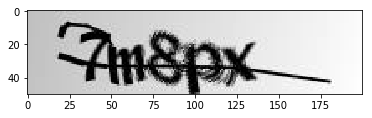

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
img=cv2.imread('./Test/1.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [14]:
print(y_test_pred[1])

7n8px


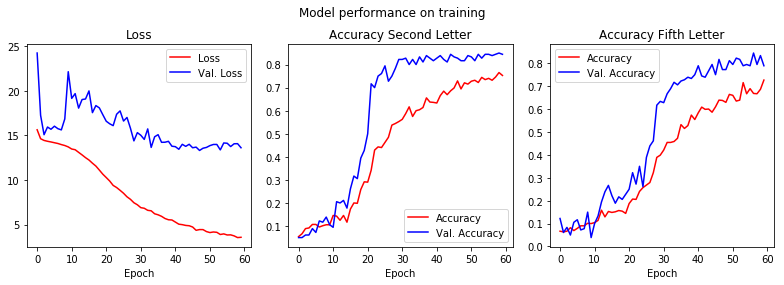

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(11, 4))

plt.sca(ax[0])
plt.plot(hist.history['loss'], color='red')
plt.plot(hist.history['val_loss'], color='blue')
plt.legend(['Loss', 'Val. Loss'])
plt.xlabel('Epoch')
plt.title('Loss')
plt.tight_layout()

#plt.sca(ax[1])
#plt.plot(hist.history['dense_2_acc'], color='red')
#plt.plot(hist.history['val_dense_2_acc'], color='blue')
#plt.legend(['Accuracy', 'Val. Accuracy'])
#plt.xlabel('Epoch')
#plt.title('Accuracy First Letter')

plt.sca(ax[1])
plt.plot(hist.history['dense_4_acc'], color='red')
plt.plot(hist.history['val_dense_4_acc'], color='blue')
plt.legend(['Accuracy', 'Val. Accuracy'])
plt.xlabel('Epoch')
plt.title('Accuracy Second Letter')

#plt.sca(ax[3])
#plt.plot(hist.history['dense_6_acc'], color='red')
#plt.plot(hist.history['val_dense_6_acc'], color='blue')
#plt.legend(['Accuracy', 'Val. Accuracy'])
#plt.xlabel('Epoch')
#plt.title('Accuracy Third Letter')

#plt.sca(ax[4])
#plt.plot(hist.history['dense_8_acc'], color='red')
#plt.plot(hist.history['val_dense_8_acc'], color='blue')
#plt.legend(['Accuracy', 'Val. Accuracy'])
#plt.xlabel('Epoch')
#plt.title('Accuracy Fourth Letter')

plt.sca(ax[2])
plt.plot(hist.history['dense_10_acc'], color='red')
plt.plot(hist.history['val_dense_10_acc'], color='blue')
plt.legend(['Accuracy', 'Val. Accuracy'])
plt.xlabel('Epoch')
plt.title('Accuracy Fifth Letter')

plt.suptitle('Model performance on training')

plt.tight_layout()
plt.subplots_adjust(top=0.85)